In [25]:
import gensim
from gensim.models import Word2Vec
import nltk
from nltk.tokenize import sent_tokenize

from sklearn.decomposition import PCA
from matplotlib import pyplot

In [15]:
import docx
doc = docx.Document('story1.docx')
text = []
for paragraph in doc.paragraphs:
    text.append(paragraph.text)
text = ''.join(text)    

In [16]:
print(text)

While Labor Day is the unofficial end of summer, it's also the unofficial start to the campaign season.That means politicking will be on the rise, especially as control of the Senate is at stake as well as control of 36 state houses. So, if you turn on your TV, expect to see more -- and nastier -- political advertisements. In fact, Elizabeth Wilner, senior vice president of Kantar Ad Intelligence, says as much as $3.4 billion is going to be spent on advertising this midterm season.The race with the most at stake is the one for U.S. Senate in Kentucky. This is not just one of the only Senate races Republicans are at risk of losing, but also the race where the top Senate Republican is at risk of losing his job.The Republican leader of the Senate, Mitch McConnell, is in a fight for his political life against Alison Lundergan Grimes, a relatively inexperienced Democratic politician who was just 8 years old when McConnell started his first term in the Senate in 1985.McConnell, a shrewd poli

In [17]:
sent_text = sent_tokenize(text)

In [19]:
# Tokenize(split) the sentences into words
word_text = [[text for text in sent_text.split()] for sent_text in sent_text]


In [20]:
word_text

[['While',
  'Labor',
  'Day',
  'is',
  'the',
  'unofficial',
  'end',
  'of',
  'summer,',
  "it's",
  'also',
  'the',
  'unofficial',
  'start',
  'to',
  'the',
  'campaign',
  'season.That',
  'means',
  'politicking',
  'will',
  'be',
  'on',
  'the',
  'rise,',
  'especially',
  'as',
  'control',
  'of',
  'the',
  'Senate',
  'is',
  'at',
  'stake',
  'as',
  'well',
  'as',
  'control',
  'of',
  '36',
  'state',
  'houses.'],
 ['So,',
  'if',
  'you',
  'turn',
  'on',
  'your',
  'TV,',
  'expect',
  'to',
  'see',
  'more',
  '--',
  'and',
  'nastier',
  '--',
  'political',
  'advertisements.'],
 ['In',
  'fact,',
  'Elizabeth',
  'Wilner,',
  'senior',
  'vice',
  'president',
  'of',
  'Kantar',
  'Ad',
  'Intelligence,',
  'says',
  'as',
  'much',
  'as',
  '$3.4',
  'billion',
  'is',
  'going',
  'to',
  'be',
  'spent',
  'on',
  'advertising',
  'this',
  'midterm',
  'season.The',
  'race',
  'with',
  'the',
  'most',
  'at',
  'stake',
  'is',
  'the',
  '

In [22]:
model = Word2Vec(word_text, min_count=1)

In [23]:
print(list(model.wv.vocab))

['While', 'Labor', 'Day', 'is', 'the', 'unofficial', 'end', 'of', 'summer,', "it's", 'also', 'start', 'to', 'campaign', 'season.That', 'means', 'politicking', 'will', 'be', 'on', 'rise,', 'especially', 'as', 'control', 'Senate', 'at', 'stake', 'well', '36', 'state', 'houses.', 'So,', 'if', 'you', 'turn', 'your', 'TV,', 'expect', 'see', 'more', '--', 'and', 'nastier', 'political', 'advertisements.', 'In', 'fact,', 'Elizabeth', 'Wilner,', 'senior', 'vice', 'president', 'Kantar', 'Ad', 'Intelligence,', 'says', 'much', '$3.4', 'billion', 'going', 'spent', 'advertising', 'this', 'midterm', 'season.The', 'race', 'with', 'most', 'one', 'for', 'U.S.', 'in', 'Kentucky.', 'This', 'not', 'just', 'only', 'races', 'Republicans', 'are', 'risk', 'losing,', 'but', 'where', 'top', 'Republican', 'losing', 'his', 'job.The', 'leader', 'Senate,', 'Mitch', 'McConnell,', 'a', 'fight', 'life', 'against', 'Alison', 'Lundergan', 'Grimes,', 'relatively', 'inexperienced', 'Democratic', 'politician', 'who', 'was',

In [24]:
model.save('model.bin')

C:\Users\Haider\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


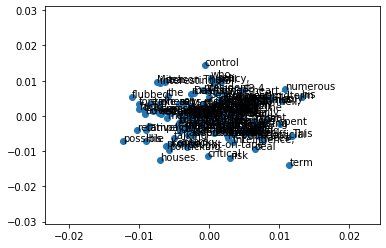

In [26]:

# fit a 2d PCA model to the vectors
X = model[model.wv.vocab]
pca = PCA(n_components=2)
result = pca.fit_transform(X)
# create a scatter plot of the projection
pyplot.scatter(result[:, 0], result[:, 1])
words = list(model.wv.vocab)
for i, word in enumerate(words):
    pyplot.annotate(word, xy=(result[i, 0], result[i, 1]))
pyplot.show()

In [27]:
print(model['control'])

[ 1.90746825e-04 -3.24315298e-03  8.65199661e-04 -4.65938076e-03
  1.03452876e-05  4.51342668e-03 -1.29584543e-04 -3.90595477e-03
 -7.67513935e-04  2.81555788e-03 -2.94687226e-03  1.23590464e-03
 -2.67795194e-03 -2.96570058e-03 -2.29436625e-03  1.38930464e-03
 -1.29379798e-03  3.23758274e-03 -2.09732633e-03 -3.03218770e-03
 -1.73784239e-04  2.48856866e-03 -8.82992579e-04 -1.41982362e-03
  4.87834634e-03  3.02469381e-03 -3.25092697e-05  8.97264836e-05
  1.64743897e-03 -4.67915274e-03  3.14930221e-04 -2.66643148e-03
 -1.16532785e-03  4.64198831e-03 -4.55797743e-03 -1.66505959e-03
 -1.41585351e-03  1.49267050e-03  1.49881328e-03  1.65657047e-03
  4.26740199e-03 -3.62392841e-03 -5.12270897e-04 -3.75866517e-03
 -4.05161688e-03 -3.63882608e-03  6.38694735e-04  1.93018839e-03
 -3.40933655e-03  2.91059585e-03  4.92762914e-03 -1.18519133e-03
  3.75425187e-03 -3.13054118e-03  4.59842989e-03  3.72342253e-03
 -2.81402655e-03  2.91750696e-03 -2.43111583e-03 -4.76850988e-03
 -4.92900331e-03 -3.98270

C:\Users\Haider\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.
